In [8]:
import ast
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
data = pd.read_csv('../data/tracks_with_genres.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 531191 entries, 0 to 531190
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        531191 non-null  int64  
 1   id                531191 non-null  object 
 2   name              531191 non-null  object 
 3   popularity        531191 non-null  int64  
 4   duration_ms       531191 non-null  int64  
 5   explicit          531191 non-null  int64  
 6   artists           531191 non-null  object 
 7   id_artists        531191 non-null  object 
 8   release_date      531191 non-null  object 
 9   danceability      531191 non-null  float64
 10  energy            531191 non-null  float64
 11  key               531191 non-null  int64  
 12  loudness          531191 non-null  float64
 13  mode              531191 non-null  int64  
 14  speechiness       531191 non-null  float64
 15  acousticness      531191 non-null  float64
 16  instrumentalness  53

In [30]:
# Convert columns containing lists to actual Python lists
keylist = ['rock',
           'filmi',
           'adult standards',
           'classical',
           'classic rock',
           'mellow gold',
           'classical performance',
           'latin',
           'soft rock',
           'album rock',
           'sufi',
           'folk rock',
           'vocal jazz',
           'classic bollywood',
           'desi pop']

data['genres'] = data['genres'].apply(ast.literal_eval)
explode_genres = data.explode('genres').dropna()
explode_genres_top15 = explode_genres['genres'].isin(keylist)
explode_genres_top15 = explode_genres[explode_genres_top15]

## Plotbars x axis is genres, y is features

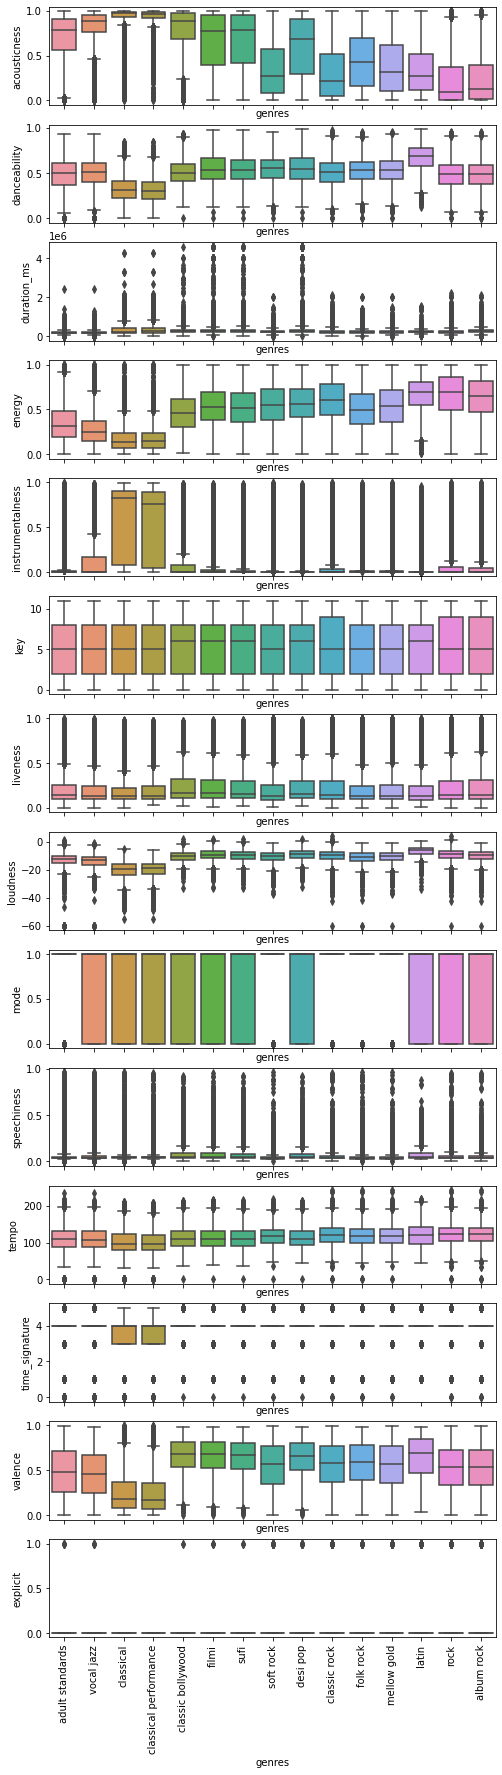

In [44]:
feature_select = ['acousticness', 'danceability', 'duration_ms', 'energy',
                  'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
                  'speechiness', 'tempo', 'time_signature', 'valence', 'explicit']
f, axs = plt.subplots(len(feature_select), 1, figsize=(8, 30), sharex='all')
for i, feature in enumerate(feature_select):
    plt.setp(axs[i].xaxis.get_majorticklabels(), rotation=90)
    sns.boxplot(x='genres', y=feature, data=explode_genres_top15, ax=axs[i])